## 1. Importing Essential Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## 2. Data Cleaninig

In [2]:
dataset_path = 'Salary_dataset.csv'
df = pd.read_csv(dataset_path)
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")
#----------------------------------------

df.dropna()
df.dropna(axis=1)
#df["YearsExperience"].fillna(df["YearsExperience"].mean(),inplace=True)

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 YearsExperience    0
Salary             0
dtype: int64


## 3.Variables Encoding

In [3]:
#one hot encode
df = pd.get_dummies(df, drop_first=True)
#--------------------------------------------------
# move y column to last coloumn
column_to_move = df.pop("Salary")
df.insert(len(df.columns), "Salary", column_to_move)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


## 4. Spliting data Sets

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
test_size = 0.2  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

## 5.Feature Scaling (dont use for simple linear regression)

In [5]:
#from sklearn.preprocessing import MinMaxScaler

#min_max_scaler = MinMaxScaler()

#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.transform(X_test)


## 6 Feature Selection

In [6]:

correalation_matrix=df.corr()
correalation_with_charge=correalation_matrix["Salary"].sort_values(ascending=False)
correalation_with_charge

Salary             1.000000
YearsExperience    0.978242
Name: Salary, dtype: float64

## 7.Training the simple Linear Regression


In [7]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

LinearRegression()

## 8. Making Predictions on the Test Data


In [8]:
y_predictions = linear_regressor.predict(X_test)

## 9. Evaluating Model Performance


In [9]:
r2 = r2_score(y_test, y_predictions)

print(f"R-squared Value: {r2}")

R-squared Value: 0.988169515729126


## 10. Visualization of Regression Results


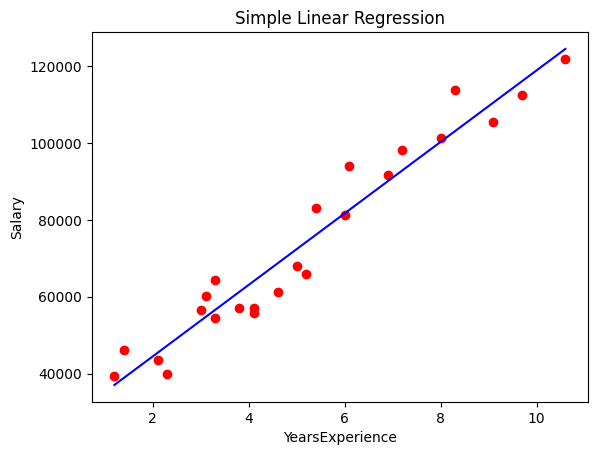

In [10]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X, linear_regressor.predict(X), color='blue')
plt.title('Simple Linear Regression')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()